<a href="https://colab.research.google.com/github/AngelTroncoso/Alura_Store_Latam/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [4]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

# Agregar una columna para identificar la tienda
tienda['tienda'] = 'tienda1'
tienda2['tienda'] = 'tienda2'
tienda3['tienda'] = 'tienda3'
tienda4['tienda'] = 'tienda4'

# Concatenar los DataFrames
datos = pd.concat([tienda, tienda2, tienda3, tienda4])

# Ver los primeros registros
datos.head(20)

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,tienda
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,tienda1
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,tienda1
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,tienda1
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,tienda1
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,tienda1
5,Bloques de construcción,Juguetes,24200.0,0.0,03/12/2020,Beatriz Morales,Cali,5,Cupón,1,3.43722,-76.52250,tienda1
6,Muñeca bebé,Juguetes,44200.0,0.0,07/08/2021,Juan Fernandez,Bogotá,3,Nequi,1,4.60971,-74.08175,tienda1
7,Lavavajillas,Electrodomésticos,1189700.0,63700.0,18/06/2021,Felipe Santos,Santa Marta,5,Tarjeta de crédito,10,11.24079,-74.19904,tienda1
8,Lavadora de ropa,Electrodomésticos,1518200.0,79000.0,08/01/2022,Izabela de León,Bogotá,1,Tarjeta de crédito,5,4.60971,-74.08175,tienda1
9,Carrito de control remoto,Juguetes,75200.0,5100.0,24/02/2020,Beatriz Morales,Bogotá,5,Nequi,1,4.60971,-74.08175,tienda1


#1. Análisis de facturación



In [13]:
#datos.groupby('tienda')['Precio'].sum().astype(int)
#datos.groupby('tienda')['Precio'].sum().apply(lambda x: "{:,.0f}".format(x))
utilidad_neta = (datos.groupby('tienda')['Precio'].sum() - datos.groupby('tienda')['Costo de envío'].sum()).apply(lambda x: "{:,.0f}".format(x))
print (utilidad_neta)

tienda
tienda1    1,089,502,500
tienda2    1,056,858,400
tienda3    1,039,503,000
tienda4      983,058,300
dtype: object


In [15]:
facturacion_por_fecha = datos.groupby(['Fecha de Compra', 'tienda'])['Precio'].sum().reset_index()
facturacion_por_fecha

,Fecha de Compra,tienda,Precio
0,01/01/2020,tienda1,1440000.0
1,01/01/2020,tienda2,139900.0
2,01/01/2020,tienda3,96300.0
3,01/01/2020,tienda4,65400.0
4,01/01/2021,tienda1,593900.0
...,...,...,...
4092,31/12/2021,tienda3,3247500.0
4093,31/12/2021,tienda4,887800.0
4094,31/12/2022,tienda1,1458500.0
4095,31/12/2022,tienda2,310700.0


In [16]:
import pandas as pd

# Convertir la Fecha de Compra a datetime
datos['Fecha de Compra'] = pd.to_datetime(datos['Fecha de Compra'])

# Calcular la facturación por fecha y tienda
facturacion_por_fecha = datos.groupby(['Fecha de Compra', 'tienda'])['Precio'].sum().reset_index()

# Pivotear la tabla para tener las tiendas como columnas
facturacion_pivot = facturacion_por_fecha.pivot_table(index='Fecha de Compra', columns='tienda', values='Precio')

# Calcular la tasa de crecimiento
tasa_crecimiento = facturacion_pivot.pct_change().mean()

# Ordenar las tiendas por tasa de crecimiento
tasa_crecimiento.sort_values(ascending=False)

<ipython-input-16-11179e503c26>:4: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  datos['Fecha de Compra'] = pd.to_datetime(datos['Fecha de Compra'])
<ipython-input-16-11179e503c26>:13: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  tasa_crecimiento = facturacion_pivot.pct_change().mean()


,0
tienda,
tienda1,4.526945
tienda2,4.246452
tienda3,4.120111
tienda4,4.086513


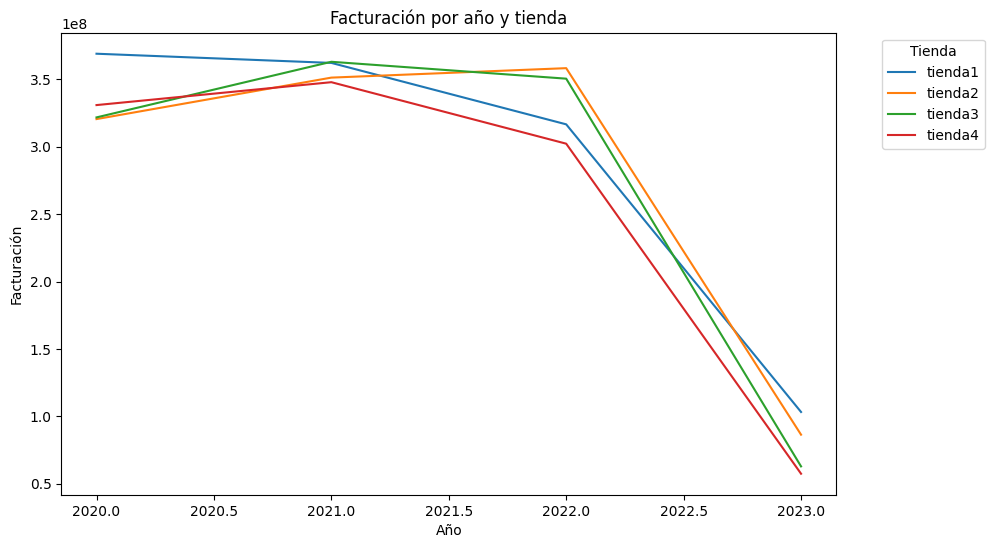

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convertir la Fecha de Compra a datetime
datos['Fecha de Compra'] = pd.to_datetime(datos['Fecha de Compra'])

# Extraer el año de la Fecha de Compra
datos['Año'] = datos['Fecha de Compra'].dt.year

# Calcular la facturación por año y tienda
facturacion_por_año = datos.groupby(['Año', 'tienda'])['Precio'].sum().reset_index()

# Crear el gráfico
plt.figure(figsize=(10,6))
sns.lineplot(x='Año', y='Precio', hue='tienda', data=facturacion_por_año)
plt.title('Facturación por año y tienda')
plt.xlabel('Año')
plt.ylabel('Facturación')
plt.legend(title='Tienda', bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

# 2. Ventas por categoría

# 3. Calificación promedio de la tienda


# 4. Productos más y menos vendidos

# 5. Envío promedio por tienda